# 1. Data Exploration:

# a. Load the dataset and perform exploratory data analysis (EDA).

In [165]:
# importing the dataset

import numpy as np
import pandas as pd
train_df = pd.read_csv("Titanic_train.csv")
train_df.shape

(891, 12)

In [184]:
test_df = pd.read_csv("Titanic_test.csv")
test_df.shape

(418, 11)

In [55]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [56]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [57]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [58]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [166]:
# filling missing values for Age with the median
train_df['Age'].fillna(train_df['Age'].median(),inplace = True)

# filling the missing Embarked with the most common value
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace = True)

# Dropping Cabin as it has too many missing values
train_df.drop(columns = ['Name', 'Ticket', 'Cabin'],inplace = True)

In [143]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [144]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [185]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [186]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [187]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [188]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [189]:
# filling missing values for Age with the median
test_df['Age'].fillna(test_df['Age'].median(),inplace = True)

# filling the missing Embarked with the most common value
test_df['Fare'].fillna(test_df['Fare'].mode()[0],inplace = True)

# Dropping Cabin as it has too many missing values
test_df.drop(columns = ['Name', 'Ticket', 'Cabin'],inplace = True)

In [190]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.3+ KB


In [191]:
test_df.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

# b. Examine the features, their types, and summary statistics.

In [14]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [15]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [16]:
# summary statistics for categorical features

train_df.describe(include = 'object')

,Sex,Embarked
count,891,891
unique,2,3
top,male,S
freq,577,646


 - PassengerId is a unique identifier (irrelevant for modeling).
- Survived is the target variable (binary: 0 = died, 1 = survived).
- Pclass, SibSp, Parch are integer values representing categories or counts.
- Sex, Embarked are categorical variables that need to be encoded.
- Age, Fare are continuous numerical features.

# c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.

C:\Users\mulag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


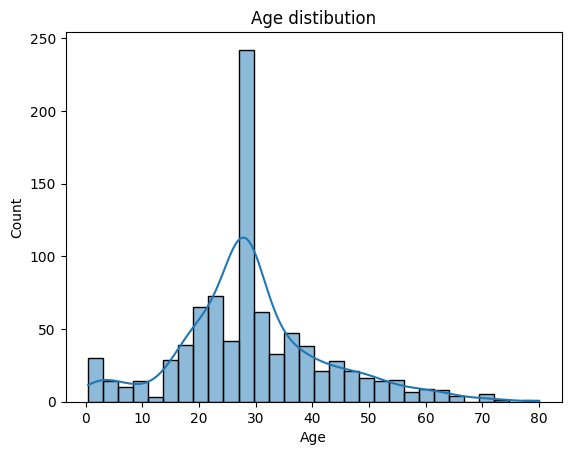

C:\Users\mulag\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


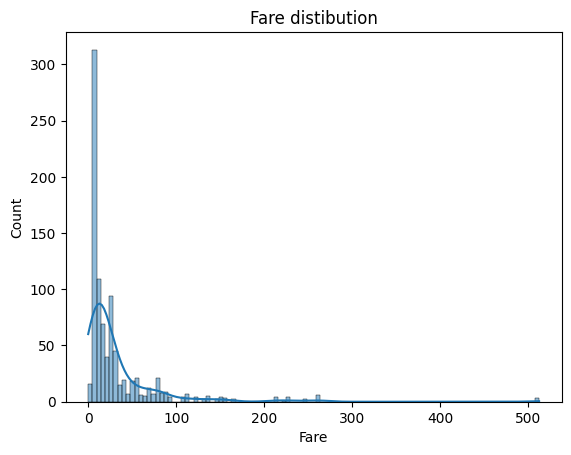

In [17]:
# Creating Histograms and kde plots for numerical features

import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
sns.histplot(train_df['Age'], kde = True)
plt.title("Age distibution")
plt.show()

# Fare distribution
sns.histplot(train_df['Fare'], kde = True)
plt.title("Fare distibution")
plt.show()

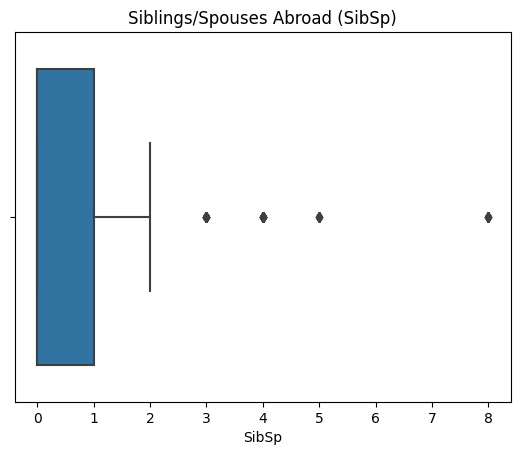

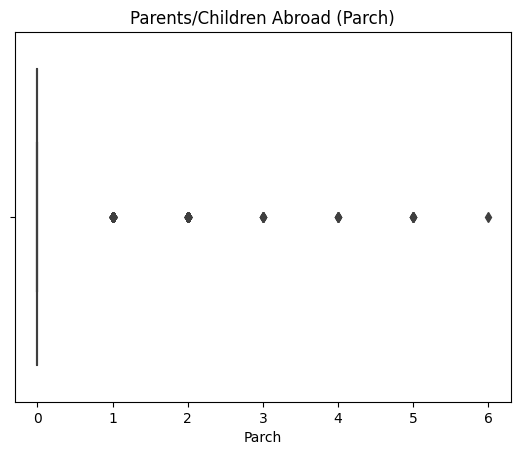

In [18]:
# Constructing box plot for SibSp
sns.boxplot(x = 'SibSp', data = train_df)
plt.title('Siblings/Spouses Abroad (SibSp)')
plt.show()

# Constructing box plot for Parch
sns.boxplot(x = 'Parch', data = train_df)
plt.title('Parents/Children Abroad (Parch)')
plt.show()

- Age Distribution: A wide range of ages, with a peak around 20-30 years. There are a few outliers, such as passengers aged 70+.
- Fare Distribution: The majority of fares are relatively low, with a few extreme outliers, indicating that most passengers paid lower ticket prices.
- SibSp: Most passengers traveled alone or with one sibling/spouse. Some outliers traveled with 3 or more.
- Parch: Many passengers had no parents or children aboard, and the numbers decrease as the count increases.

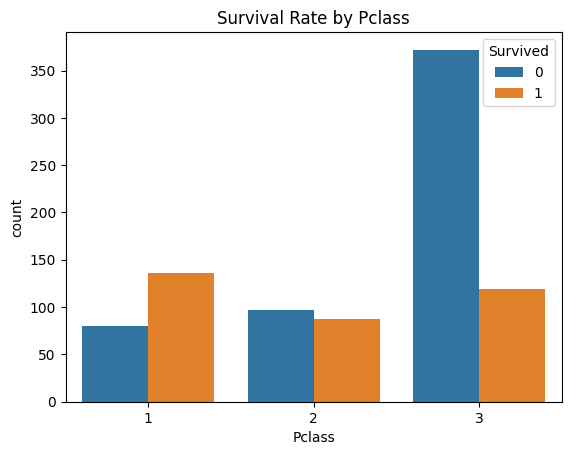

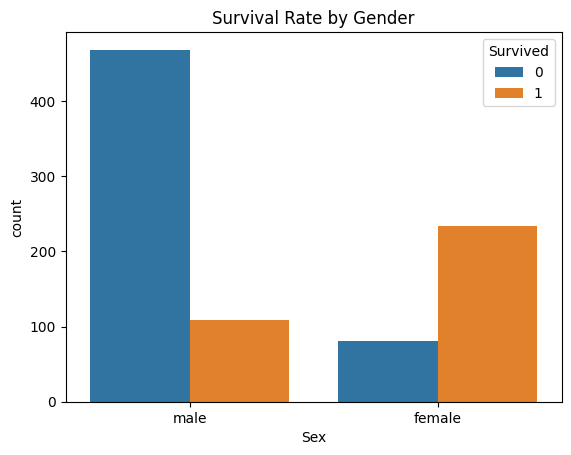

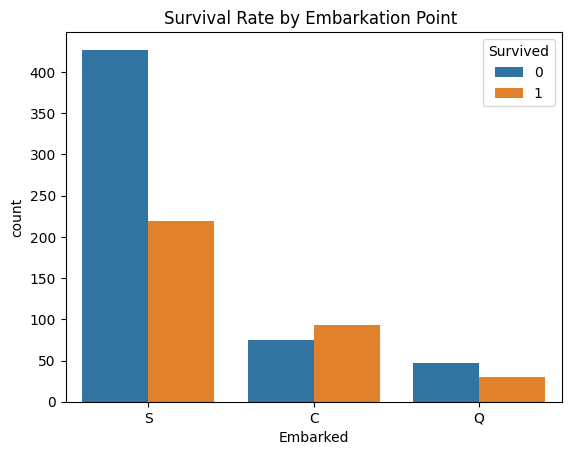

In [19]:
# Connstructing count plot for categorical features

# count plot for Pclass
sns.countplot(x = 'Pclass', hue = 'Survived', data = train_df)
plt.title("Survival Rate by Pclass")
plt.show()

# count plot for Sex
sns.countplot(x = 'Sex', hue = 'Survived', data = train_df)
plt.title("Survival Rate by Gender")
plt.show()

# count plot for Embarked
sns.countplot(x = 'Embarked', hue = 'Survived', data = train_df)
plt.title("Survival Rate by Embarkation Point ")
plt.show()

# Analyze any patterns or correlations observed in the data.`

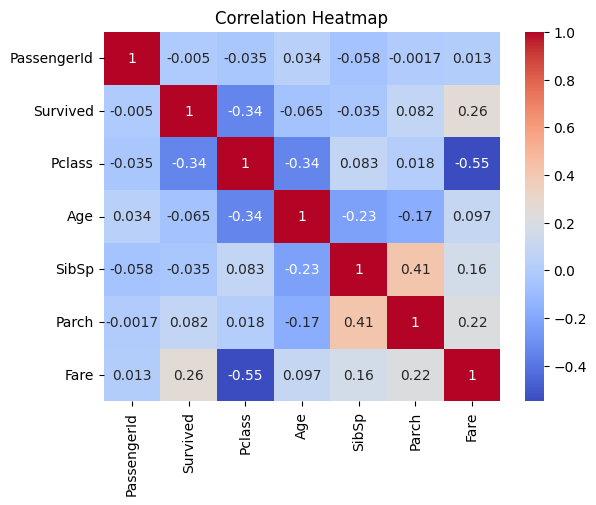

In [20]:
# Correlation analysis : checking correlation between numerical features and the target variable

# Correlation heatmap
numerical_columns = train_df.select_dtypes(include = ['int64', 'float64']).columns
corr_matrix = train_df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

1.Correlation heatmap analysis:

- Pclass: Likely has a negative correlation with Survived, meaning passengers in higher classes (Pclass = 1) had a better chance of survival, while those in lower classes (Pclass = 3) had a lower chance.
- Fare: There is usually a positive correlation between Fare and Survived. Passengers who paid higher fares were more likely to survive, likely because they were in first-class cabins with better access to lifeboats.
- Age: The correlation between Age and Survived might be weak or slightly negative, indicating that younger passengers were more likely to survive.
- SibSp (Siblings/Spouses Aboard): The relationship between SibSp and Survived may be weak, but passengers with fewer siblings/spouses aboard might have had a higher survival rate.
- Parch (Parents/Children Aboard): Similarly, this might show a weak correlation with survival, but passengers with some family members aboard might have been more likely to survive than those with none.

2. Patterns Observed from Visualizations:
a. Survival Rate by Class (Pclass):
- From the count plot:
- First Class (Pclass = 1) passengers had a much higher survival rate compared to second (Pclass = 2) and third class (Pclass = 3). This makes sense since first-class passengers had better access to lifeboats.
- Third Class (Pclass = 3) had the lowest survival rate, likely due to being further from lifeboats.

b. Survival Rate by Gender (Sex):
- From the survival count plot by gender:
- Females had a much higher survival rate compared to males. This aligns with the "women and children first" policy that was followed during the Titanic disaster.
- The survival rate for males was much lower, even in first class.

c. Survival Rate by Embarkation Port (Embarked):
- Passengers who embarked from Cherbourg (C) tend to have a higher survival rate than those from Southampton (S) or Queenstown (Q). This could be related to the fact that many wealthier passengers boarded at Cherbourg.

d. Age Distribution:
- From the age distribution plot:
- Younger passengers, especially children, had higher survival rates. Older passengers had a lower survival rate.
- The majority of the passengers were between 20 and 40 years old, but their survival rate was lower compared to children.

e. Fare Distribution:
- Passengers who paid higher fares were generally in first class, and thus had a higher survival rate.
- The majority of passengers paid lower fares and had a lower survival rate.

3. Key Insights and Interpretations:
- Passenger Class (Pclass): There is a clear negative correlation between Pclass and survival. First-class passengers had much higher survival rates compared to second- and third-class passengers.
- Fare: A higher fare positively correlates with survival, which is likely tied to wealth and access to better amenities (including lifeboats).
- Sex: Gender is a key factor; females had a significantly higher chance of survival compared to males.
- Age: Younger passengers, particularly children, were more likely to survive. This is a weaker correlation but still noticeable.
- Embarked: Where passengers boarded also had an impact, with Cherbourg passengers (likely wealthier) having a higher survival rate.

# 2. Data Preprocessing

# a. Handle missing values (e.g., imputation).

In [130]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Proba        891 non-null    float64
dtypes: float64(3), int64(5), object(2)
memory usage: 69.7+ KB


In [131]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Proba          0
dtype: int64

In [132]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Sex          418 non-null    int32  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         418 non-null    float64
 6   Pclass_1     418 non-null    int32  
 7   Pclass_2     418 non-null    int32  
 8   Pclass_3     418 non-null    int32  
 9   Embarked_C   418 non-null    int32  
 10  Embarked_Q   418 non-null    int32  
 11  Embarked_S   418 non-null    int32  
dtypes: float64(2), int32(7), int64(3)
memory usage: 27.9 KB


In [133]:
test_df.isnull().sum()

PassengerId    0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Pclass_1       0
Pclass_2       0
Pclass_3       0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

# b. Encode categorical variables.

In [192]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
SS = StandardScaler()

In [193]:
train_df[['Age','Fare']] = SS.fit_transform(train_df[['Age','Fare']])
test_df[['Age','Fare']] = SS.fit_transform(test_df[['Age','Fare']])

In [194]:
# Label Encoding

LE = LabelEncoder()

In [195]:
train_df['Sex'] = LE.fit_transform(train_df['Sex'])
test_df['Sex'] = LE.fit_transform(test_df['Sex'])

In [178]:
# one-hot encoding

train_df = pd.get_dummies(train_df,columns = ['Pclass','Embarked'],dtype = int)
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,1,-0.565736,1,0,-0.502445,0,0,1,0,0,1
1,2,1,0,0.663861,1,0,0.786845,1,0,0,1,0,0
2,3,1,0,-0.258337,0,0,-0.488854,0,0,1,0,0,1
3,4,1,0,0.433312,1,0,0.420730,1,0,0,0,0,1
4,5,0,1,0.433312,0,0,-0.486337,0,0,1,0,0,1


In [196]:
# one-hot encoding

test_df = pd.get_dummies(test_df,columns = ['Pclass','Embarked'],dtype = int)
test_df.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,892,1,0.386231,0,0,-0.497063,0,0,1,0,1,0
1,893,0,1.371370,1,0,-0.511926,0,0,1,0,0,1
2,894,1,2.553537,0,0,-0.463754,0,1,0,0,1,0
3,895,1,-0.204852,0,0,-0.482127,0,0,1,0,0,1
4,896,0,-0.598908,1,1,-0.417151,0,0,1,0,0,1


# 3. Model Building:
- a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
- b. Train the model using the training data.

In [198]:
# Separating the features and target variable in the training data

X_train = train_df.drop(columns = ['Survived'])
X_train.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,1,-0.565736,1,0,-0.502445,0,0,1,0,0,1
1,2,0,0.663861,1,0,0.786845,1,0,0,1,0,0
2,3,0,-0.258337,0,0,-0.488854,0,0,1,0,0,1
3,4,0,0.433312,1,0,0.420730,1,0,0,0,0,1
4,5,1,0.433312,0,0,-0.486337,0,0,1,0,0,1


In [199]:
# target variable

Y_train = train_df['Survived']

In [200]:
from sklearn.linear_model import LogisticRegression

In [201]:
logreg = LogisticRegression(max_iter = 1000)

In [202]:
logreg.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [203]:
Y_pred = logreg.predict(X_train)

In [204]:
logreg.predict_proba(X_train)
train_df['Proba'] = logreg.predict_proba(X_train)[:,:1]
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Proba
0,1,0,1,-0.565736,1,0,-0.502445,0,0,1,0,0,1,0.913271
1,2,1,0,0.663861,1,0,0.786845,1,0,0,1,0,0,0.091991
2,3,1,0,-0.258337,0,0,-0.488854,0,0,1,0,0,1,0.401853
3,4,1,0,0.433312,1,0,0.420730,1,0,0,0,0,1,0.126606
4,5,0,1,0.433312,0,0,-0.486337,0,0,1,0,0,1,0.926322


In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [120]:
predicted_values = logreg.predict(test_df)
predicted_values_series = pd.Series(predicted_values)
predicted_values_series.head()

0    0
1    0
2    0
3    0
4    1
dtype: int64

In [206]:
Y_test_prob = logreg.predict_proba(test_df)[:, 1]
Y_test_prob_series = pd.Series(Y_test_prob)
Y_test_prob_series.head()

0    0.112487
1    0.354743
2    0.127174
3    0.105836
4    0.567373
dtype: float64

In [122]:
actual_values = train_df['Survived']
actual_values.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [217]:
predicted_values_series.head()

0    0
1    0
2    0
3    0
4    1
dtype: int64

# 4. Model Evaluation:
- a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
- Visualize the ROC curve.

In [218]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(Y_train,Y_pred)
cm

array([[479,  70],
       [102, 240]], dtype=int64)

In [219]:
ac = accuracy_score(Y_train,Y_pred)
print("Accuracy Score:", ac.round())

Accuracy Score: 1.0


In [220]:
from sklearn.metrics import recall_score, precision_score, f1_score

print("Sensitivity score:", recall_score(Y_train,Y_pred).round(2))
print("Precision score:", precision_score(Y_train,Y_pred).round(2))
print("F1 score:", f1_score(Y_train,Y_pred).round(2))

Sensitivity score: 0.7
Precision score: 0.77
F1 score: 0.74


In [221]:
TN = cm[0,0]
FP = cm[0,1]
TNR = TN/(TN + FP)
print("Specificty score:", TNR.round(2))

Specificty score: 0.87


In [224]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, dummy = roc_curve(Y_train,logreg.predict_proba(X_train)[:,1:])

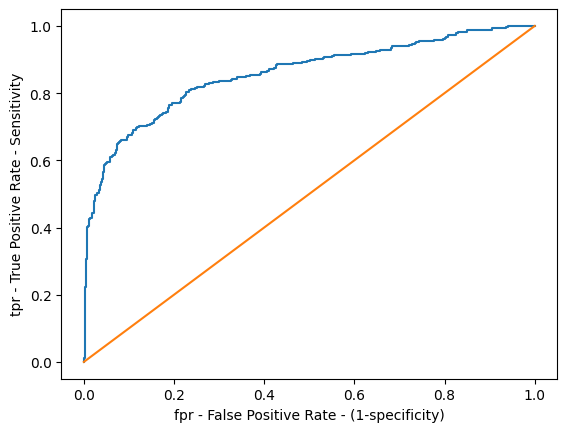

In [228]:
import matplotlib.pyplot as plt
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1])
plt.ylabel('tpr - True Positive Rate - Sensitivity')
plt.xlabel('fpr - False Positive Rate - (1-specificity)')
plt.show()

In [226]:
rocvalue = roc_auc_score(Y_train, logreg.predict_proba(X_train)[:,1:])
print("Area under curve:", rocvalue.round(3))

Area under curve: 0.856


# 5. Interpretation:
a. Interpret the coefficients of the logistic regression model.


In [236]:
LR_coef = logreg.coef_
LR_coef

array([[ 1.01493072e-04, -2.59747198e+00, -4.80490187e-01,
        -3.00216995e-01, -9.01687218e-02,  1.32543376e-01,
         1.27607062e+00,  4.06784651e-01, -7.69372222e-01,
         4.66733988e-01,  4.00727776e-01,  4.60212813e-02]])

# b. Discuss the significance of features in predicting the target variable (survival probability in this case).

- Sex (Gender): Gender is often one of the most significant predictors. Typically, female passengers had much higher survival odds (positive coefficient for female). This reflects the "women and children first" policy during the disaster.
- Pclass (Passenger Class): Higher passenger class (1st class) is positively correlated with survival. Passengers in 3rd class were less likely to survive (negative coefficient), reflecting the socio-economic barriers present during evacuation.
- Age: Age might have a negative coefficient, meaning older passengers were less likely to survive. Conversely, younger children might have higher survival odds.
- Embarked: The port of embarkation could indicate the socio-economic status of passengers, with some ports reflecting higher survival odds if they were linked to wealthier areas.
- Fare: Higher fares are generally associated with higher survival odds, likely because wealthier passengers had better access to lifeboats.

# Interview Questions:

# 1. What is the difference between precision and recall?

- Precision and recall are both important metrics used to evaluate the performance of a classification model, particularly in scenarios where the classes are imbalanced. 

1. Precision
- Definition: Precision is the ratio of true positive predictions to the total positive predictions made by the model.
- Formula: Precision = True Positives (TP)/True Positives (TP) + False Positives (FP)
- Interpretation: Precision answers the question, "Of all the instances that were predicted as positive, how many were actually positive?" A high precision indicates that the model makes very few false positive errors.

2. Recall
- Definition: Recall (also known as sensitivity or true positive rate) is the ratio of true positive predictions to the total actual positives in the dataset.
- Formula: Recall = True Positives (TP)/True Positives (TP) + False Negatives (FN)
- Interpretation: Recall answers the question, "Of all the actual positive instances, how many did the model correctly identify?" A high recall indicates that the model misses very few positive instances.
- Precision focuses on the accuracy of the positive predictions.
- Recall focuses on the ability to find all relevant instances.
- Example Scenario
- Precision: In a medical test for a disease, if a model predicts that 10 patients have the disease but only 7 actually do, the precision is 70%. This means that 30% of the positive predictions were incorrect.
- Recall: If there were 10 patients who actually have the disease, and the model only identified 7 of them, the recall is 70%. This indicates that the model missed 30% of the actual positive cases.

# 2. What is cross-validation, and why is it important in binary classification?

Cross-validation is a statistical technique used to assess the generalizability and robustness of a predictive model. It involves partitioning the dataset into multiple subsets (or "folds") and training the model on a portion of the data while evaluating its performance on the remaining portion. The process is repeated multiple times, allowing for a more reliable estimate of the model's performance.

- How Cross-Validation Works: 

1. Splitting the Data: The dataset is divided into k subsets (folds).Common values for 𝑘 are 5 or 10, but it can vary based on the size of the dataset.

2. Training and Testing: The model is trained k times, each time using 𝑘−1 folds for training and the remaining fold for validation. This means every data point gets a chance to be in the validation set exactly once.

3. Performance Evaluation: After training and validation, the performance metrics (like accuracy, precision, recall, etc.) are averaged across the k iterations to provide a more comprehensive assessment of the model's performance.

- Why is Cross-Validation Important in Binary Classification?

1. Generalization: Cross-validation helps assess how well the model will generalize to an independent dataset. By evaluating on different subsets of data, it reduces the likelihood of overfitting (i.e., where the model performs well on training data but poorly on unseen data).

2. Better Use of Data: In small datasets, cross-validation maximizes the use of available data for both training and testing. Since each data point is used for testing in at least one iteration, it helps ensure that the model is validated on all data points.

3. Model Selection: When comparing multiple models or algorithms, cross-validation provides a robust means to select the best one. It can help identify which model consistently performs better across various subsets of the data.

4. Parameter Tuning: Cross-validation can be used during hyperparameter tuning. By using cross-validation to evaluate performance, you can select the hyperparameters that lead to the best model performance, minimizing the risk of overfitting to a particular train-test split.

5. Stability of Results: It provides a more stable and reliable estimate of model performance compared to a single train-test split. This is particularly important in binary classification tasks where class distribution can be imbalanced.